<a href="https://colab.research.google.com/github/sriraj934/Stock_price_prediction/blob/main/rnn_for_google_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [ ]:
 dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
 training_set = dataset_train.iloc[:,1:2].values

In [ ]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaler = sc.fit_transform(training_set)

In [ ]:
print(training_set_scaler)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaler[i-60:i,0])
  y_train.append(training_set_scaler[i, 0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [ ]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [ ]:
print(training_set_scaler[60,0])

0.08627874097775134


In [ ]:
print(training_set_scaler[59,0])

0.08497656075600868


In [ ]:
print(training_set_scaler[0,0])

0.08581367661284323


### Reshaping

if we just write X_train.shape -will display both

In specific
*   For Number of Rows - X_train.shape[0]
*   For number of Column - X_train.shape[1]

In [ ]:
print(X_train.shape[1])

60


In [ ]:
print(X_train.shape[0])

1198


Finall code of Reshaping is 
* From 2D (X_train) --> 3Dimension(X_train)
In 3D last one means Indicator


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(1198, 60, 1)


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=60 , return_sequences=True , input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=60 , return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=60 , return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=60 , return_sequences=False))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train,y_train,epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 103ms/step - loss: 0.0939
Epoch 2/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0038
Epoch 8/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0041
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values
print(real_stock_price.shape)

(20, 1)


### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_Stock_price = regressor.predict(X_test)
predicted_Stock_price = sc.inverse_transform(predicted_Stock_price)

In [ ]:
print(predicted_Stock_price)

[[789.02484]
 [786.00726]
 [786.82916]
 [788.6155 ]
 [792.4445 ]
 [799.0679 ]
 [804.68097]
 [806.44214]
 [806.5105 ]
 [806.3085 ]
 [806.1982 ]
 [805.95886]
 [805.7006 ]
 [806.24255]
 [807.1855 ]
 [812.5602 ]
 [820.20935]
 [827.99774]
 [831.5318 ]
 [825.64813]]


### Visualising the results

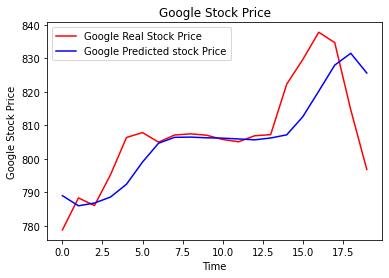

In [ ]:
plt.plot(real_stock_price,color='red',label='Google Real Stock Price')
plt.plot(predicted_Stock_price,color='blue',label='Google Predicted stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## To Evaluate the model  
## * we use RMSE(Root Mean Squared Error)
* it s the closness between the actual stock price and predicted stock price

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_Stock_price))
print(rmse)

10.999635359827533
